In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.keras.models import load_model
model_GRU=load_model("finalModelPredict.h5")

In [3]:
import yfinance as yf
sym="BHEL.NS"
ticker=yf.Ticker(sym)
stock=ticker.history(period="10y")
dff=stock

In [4]:
dff
dff.columns=dff.columns.str.lower()

In [5]:
df=dff


In [6]:
split=2021
train_set = df[:f'{split}'][['close']].values
test_set = df[f'{split+1}':][['close']].values
scaler = MinMaxScaler(feature_range=(0,1))
train_set_new = scaler.fit_transform(train_set)

In [7]:
X_train = []
y_train = []
for i in range(60, len(train_set_new)):
    X_train.append(train_set_new[i-60:i, 0])
    y_train.append(train_set_new[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [8]:
test_set = scaler.transform(test_set)
X_test = []
for i in range(60, len(test_set)):
    X_test.append(test_set[i-60:i, 0])
X_test = np.array(X_test) # transform X_test into np array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
real_stock_price = scaler.inverse_transform(test_set[60:]) # starts from day 61

In [9]:
X_test = []
for i in range(60,len(test_set)):
    X_test.append(test_set[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_pred_GRU = model_GRU.predict(X_test)
y_pred_GRU = scaler.inverse_transform(y_pred_GRU)
real_stock_price = scaler.inverse_transform(X_test[:,0,0].reshape((1,-1))) # starts from day 61

18/18 [==============================] - 6s 73ms/step


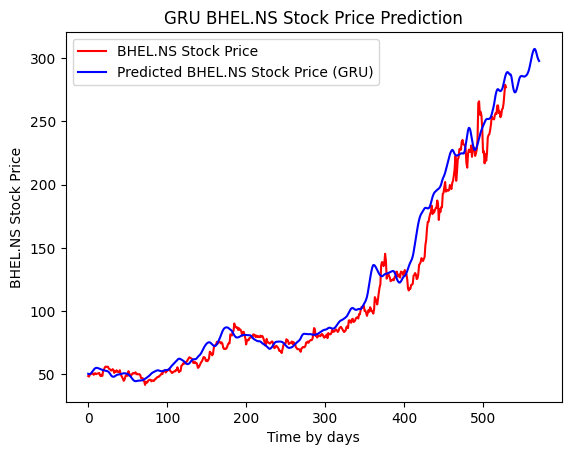

In [10]:
plt.plot(real_stock_price.T[42:], color = 'red' , label = f'{sym} Stock Price')
plt.plot(y_pred_GRU, color = 'blue', label = f'Predicted {sym} Stock Price (GRU)')
plt.title(f'GRU {sym} Stock Price Prediction')
plt.xlabel('Time by days')
plt.ylabel(f'{sym} Stock Price')
plt.legend()
plt.show()